In [180]:
#Import necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [181]:
IMAGE_SIZE = 256
BATCH_SIZE = 10
CHANNELS =3

In [182]:
#Load training dataset
dataset= tf.keras.preprocessing.image_dataset_from_directory(
            "train",
            shuffle=True,
            image_size = (IMAGE_SIZE, IMAGE_SIZE),
            batch_size = BATCH_SIZE
)

Found 40 files belonging to 2 classes.


In [183]:
#Load testing dataset
test_ds= tf.keras.preprocessing.image_dataset_from_directory(
            "test",
            shuffle=True,
            image_size = (IMAGE_SIZE, IMAGE_SIZE),
            batch_size = BATCH_SIZE
)

Found 20 files belonging to 2 classes.


In [184]:
#Print class names
class_names = dataset.class_names
class_names

['cats', 'dogs']

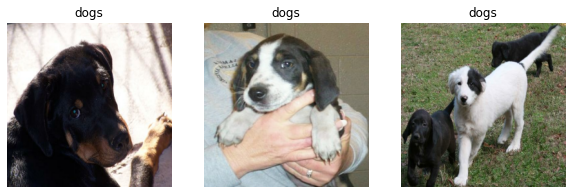

In [185]:
#Display shuffled input images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(3):
        ax = plt.subplot(1,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [186]:
#Optimise pipeline performance
train_ds = dataset.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

In [187]:
#Image resizing and rescaling
resize_n_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [188]:
#Apply data augumentation
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [189]:
#Convolutional Neural Network model building
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
fc_size = 32

model = models.Sequential([
    resize_n_rescale,
    data_augumentation,
    layers.Conv2D(32, (5,5),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(pool_size=(2, 2),strides = 2),
    layers.Conv2D(64, (5,5),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(pool_size=(2, 2),strides = 2),
    layers.Flatten(),
    layers.Dense(fc_size, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation= 'softmax'),
])

model.build(input_shape = input_shape)

In [190]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (10, 256, 256, 3)         0         
                                                                 
 sequential_13 (Sequential)  (10, 256, 256, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (10, 252, 252, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (10, 126, 126, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (10, 122, 122, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (10, 61, 61, 64)         0         
 2D)                                                 

In [191]:
#Model compilation
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics = ['accuracy'])

In [192]:
#Model Fitting for 100 iterations i.e; 25 epochs
history = model.fit(
    train_ds,
    epochs = 25,
    batch_size = BATCH_SIZE,
    verbose=1,
)

Epoch 1/25
4/4 [==============================] - 10s 2s/step - loss: 1.3100 - accuracy: 0.3750
Epoch 2/25
4/4 [==============================] - 7s 2s/step - loss: 0.9314 - accuracy: 0.5500
Epoch 3/25
4/4 [==============================] - 6s 2s/step - loss: 0.9358 - accuracy: 0.5250
Epoch 4/25
4/4 [==============================] - 6s 2s/step - loss: 0.9820 - accuracy: 0.4000
Epoch 5/25
4/4 [==============================] - 6s 2s/step - loss: 1.0342 - accuracy: 0.3750
Epoch 6/25
4/4 [==============================] - 7s 2s/step - loss: 0.9091 - accuracy: 0.4250
Epoch 7/25
4/4 [==============================] - 6s 2s/step - loss: 0.7281 - accuracy: 0.5750
Epoch 8/25
4/4 [==============================] - 6s 2s/step - loss: 0.9880 - accuracy: 0.4000
Epoch 9/25
4/4 [==============================] - 6s 2s/step - loss: 0.8827 - accuracy: 0.4500
Epoch 10/25
4/4 [==============================] - 7s 2s/step - loss: 0.7368 - accuracy: 0.6750
Epoch 11/25
4/4 [==============================]

In [193]:
model1_accuracy = history.history['accuracy']
model1_loss = history.history['loss']

In [194]:
#Model Evaluation on test data for 100 iterations i.e; 25 epochs
model.evaluate(test_ds)

2/2 [==============================] - 1s 455ms/step - loss: 0.7107 - accuracy: 0.6000


[0.7106970548629761, 0.6000000238418579]

In [195]:
model1_loss_on_test = model.evaluate(test_ds)[0]
model1_accuracy_on_test = model.evaluate(test_ds)[1]

2/2 [==============================] - 1s 451ms/step - loss: 0.7107 - accuracy: 0.6000


In [196]:
#Model Fitting for 200 iterations i.e; 50 epochs
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose=1,
)

Epoch 1/50
4/4 [==============================] - 7s 2s/step - loss: 0.8160 - accuracy: 0.5250
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.7250 - accuracy: 0.6750
Epoch 3/50
4/4 [==============================] - 6s 2s/step - loss: 0.6774 - accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 6s 2s/step - loss: 0.6897 - accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.7193 - accuracy: 0.4750
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.7214 - accuracy: 0.6250
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.7042 - accuracy: 0.6500
Epoch 8/50
4/4 [==============================] - 6s 2s/step - loss: 0.7021 - accuracy: 0.5750
Epoch 9/50
4/4 [==============================] - 6s 2s/step - loss: 0.6301 - accuracy: 0.7250
Epoch 10/50
4/4 [==============================] - 6s 2s/step - loss: 0.7935 - accuracy: 0.6250
Epoch 11/50
4/4 [==============================] 

In [197]:
model2_accuracy = history.history['accuracy']
model2_loss = history.history['loss']

In [198]:
#Model Evaluation on test data for 200 iterations i.e; 50 epochs
model.evaluate(test_ds)

2/2 [==============================] - 1s 453ms/step - loss: 1.3647 - accuracy: 0.5000


[1.36474609375, 0.5]

In [199]:
model2_loss_on_test = model.evaluate(test_ds)[0]
model2_accuracy_on_test = model.evaluate(test_ds)[1]

2/2 [==============================] - 1s 438ms/step - loss: 1.3647 - accuracy: 0.5000


In [200]:
#Model Fitting for 300 iterations i.e; 75 epochs
history = model.fit(
    train_ds,
    epochs = 75,
    batch_size = BATCH_SIZE,
    verbose=1,
)

Epoch 1/75
4/4 [==============================] - 6s 2s/step - loss: 0.5063 - accuracy: 0.7000
Epoch 2/75
4/4 [==============================] - 6s 2s/step - loss: 0.4936 - accuracy: 0.7250
Epoch 3/75
4/4 [==============================] - 6s 2s/step - loss: 0.4690 - accuracy: 0.8250
Epoch 4/75
4/4 [==============================] - 6s 2s/step - loss: 0.5356 - accuracy: 0.7250
Epoch 5/75
4/4 [==============================] - 6s 2s/step - loss: 0.4982 - accuracy: 0.7000
Epoch 6/75
4/4 [==============================] - 6s 2s/step - loss: 0.4421 - accuracy: 0.8000
Epoch 7/75
4/4 [==============================] - 6s 2s/step - loss: 0.5172 - accuracy: 0.7500
Epoch 8/75
4/4 [==============================] - 6s 2s/step - loss: 0.3687 - accuracy: 0.8250
Epoch 9/75
4/4 [==============================] - 6s 2s/step - loss: 0.4715 - accuracy: 0.7000
Epoch 10/75
4/4 [==============================] - 6s 2s/step - loss: 0.4530 - accuracy: 0.7000
Epoch 11/75
4/4 [==============================] 

In [201]:
model3_accuracy = history.history['accuracy']
model3_loss = history.history['loss']

In [202]:
#Model Evaluation on test data for 300 iterations i.e; 75 epochs
model.evaluate(test_ds)

2/2 [==============================] - 1s 438ms/step - loss: 3.0875 - accuracy: 0.4500


[3.0875468254089355, 0.44999998807907104]

In [203]:
model3_loss_on_test = model.evaluate(test_ds)[0]
model3_accuracy_on_test = model.evaluate(test_ds)[1]

2/2 [==============================] - 1s 422ms/step - loss: 3.0875 - accuracy: 0.4500


In [204]:
#Prediction of images along with calculation of confidence of prediction 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 78ms/step


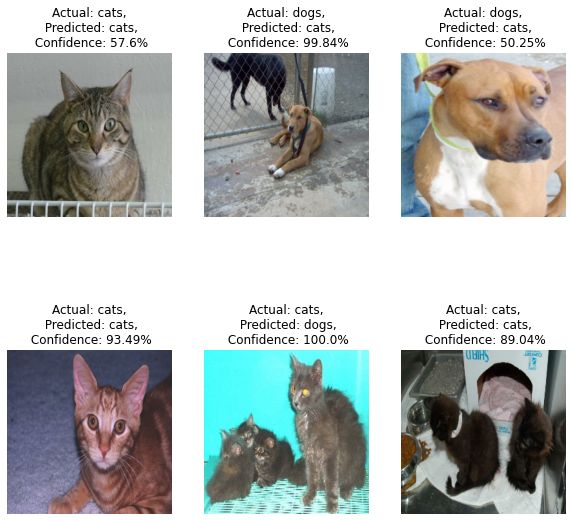

In [205]:
#Plot Actual , predicted images along with prediction confidence in %
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [206]:
data_accuracy = [model1_accuracy, model2_accuracy, model3_accuracy]
df_accuracy =pd.DataFrame(data_accuracy)
df_average_accuracy = df_accuracy.mean(axis=1)

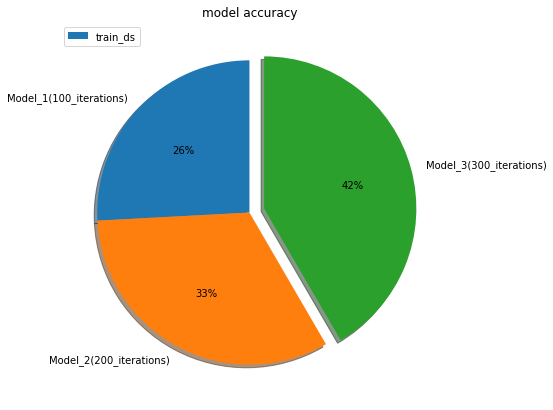

In [207]:
#Conclusion
#Plot accuracy on the train data for 100, 200, and 300 iterations, respectively
model_name = ['Model_1(100_iterations)','Model_2(200_iterations)','Model_3(300_iterations)']
explode = (0, 0, 0.1) 
fig = plt.figure(figsize =(10, 7))
plt.pie(df_average_accuracy,explode=explode, labels = model_name, autopct='%.0f%%',
        shadow=True, startangle=90)

plt.title('model accuracy')

plt.legend(['train_ds'], loc='upper left')
plt.show()

In [208]:
data_loss = [model1_loss, model2_loss, model3_loss]
df_loss =pd.DataFrame(data_loss)
df_average_loss = df_loss.mean(axis=1)

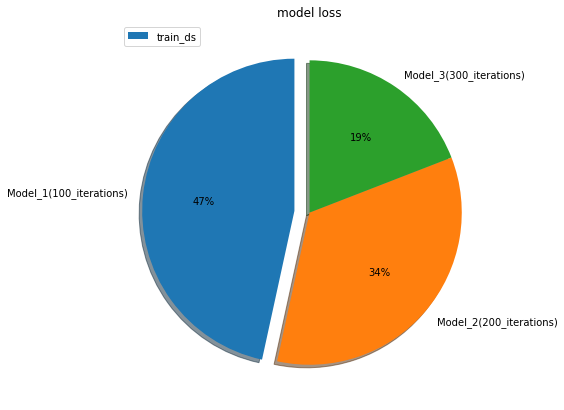

In [209]:
#Conclusion
#Plot loss on the train data for 100, 200, and 300 iterations, respectively
model_name = ['Model_1(100_iterations)','Model_2(200_iterations)','Model_3(300_iterations)']
explode = (0.1, 0, 0) 
fig = plt.figure(figsize =(10, 7))
plt.pie(df_average_loss,explode=explode, labels = model_name, autopct='%.0f%%',
        shadow=True, startangle=90)

plt.title('model loss')

plt.legend(['train_ds'], loc='upper left')
plt.show()